In [1]:
import os
import numpy as np
import json
import sys
from scipy.spatial import distance
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
#torch.cuda.set_device(2) 

import pandas as pd 
#pd.set_option('compute.use_numexpr', False)
import numpy as np 
from collections import defaultdict
import re
import sys
from sklearn.model_selection import train_test_split
import gzip

import csv
import pandas as pd 
import numpy as np 
from collections import defaultdict
import re
import sys
from sklearn.model_selection import train_test_split
import datetime
import matplotlib.pyplot as plt
import time
import numpy as np
from pprint import pprint

import spacy  # For preprocessing
import nltk
nltk.download('wordnet')
import string

import preprocessor as p  #pip install tweet-preprocessor
import logging  # Setting up the loggings to monitor gensim
from nltk.stem import WordNetLemmatizer
from string import punctuation as punc

import gensim
import gensim.corpora as corpora
#from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim.models as gsm
from gensim.test.utils import datapath

import regex
import glob
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
# import torchvision.transforms as transforms
from torch.autograd import Variable

torch.manual_seed(1)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tunazislam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Theme and Moral foundation correlation heatmap


In [2]:
df = pd.read_csv('data/Covid/gt_mf_llm_sbert_covid.csv', index_col=False) ##554
print(df.shape)
# Remove columns whose names start with 'Unnamed'
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.loc[(df.pred_theme_llms != 'No matches found') ]
df = df.reset_index(drop=True)
# print(df.shape)
df

(565, 6)


,id,ad_creative_body,pred_theme_sbert,gt_theme,moral_foundation,pred_theme_llms
0,4.237058e+14,Looking for a food pantry or food distribution...,CovidPlan,VaccineRollout,none,CommunityServiceByCandidate
1,2.919943e+14,"Tested for safety and trusted by doctors, the ...",VaccineEfficacy,VaccineEfficacy,none,VaccineEfficacy
2,4.314172e+14,Newsom's school vaccine mandate is one of the ...,VaccineMandate,VaccineMandate,authority/subversion,VaccineMandate
3,5.836623e+14,Don't know if it is moral to take the COVID va...,VaccineReligion,VaccineReligion,none,VaccineReligion
4,1.201580e+15,"Take Your Best Shot | ""I'm fully vaccinated ag...",VaccineEfficacy,VaccineEfficacy,none,VaccineEfficacy
...,...,...,...,...,...,...
560,2.962683e+15,“The natural immune protection that develops a...,NaturalImmunity,NaturalImmunity,none,NaturalImmunity
561,2.606553e+14,Delta is more than twice as contagious as the ...,NaturalImmunity,VaccineEfficacy,none,VaccineEfficacy
562,1.858377e+14,Is natural immunity from COVID-19 better than ...,NaturalImmunity,NaturalImmunity,none,VaccineEfficacy
563,9.056493e+14,"Good morning fam, here's Rand Paul spitting st...",UrgentPoliticalAdvocacy,NaturalImmunity,none,NaturalImmunity


In [3]:
df = df.rename(columns={'pred_theme_llms': 'Theme'}) 

df

,id,ad_creative_body,pred_theme_sbert,gt_theme,moral_foundation,Theme
0,4.237058e+14,Looking for a food pantry or food distribution...,CovidPlan,VaccineRollout,none,CommunityServiceByCandidate
1,2.919943e+14,"Tested for safety and trusted by doctors, the ...",VaccineEfficacy,VaccineEfficacy,none,VaccineEfficacy
2,4.314172e+14,Newsom's school vaccine mandate is one of the ...,VaccineMandate,VaccineMandate,authority/subversion,VaccineMandate
3,5.836623e+14,Don't know if it is moral to take the COVID va...,VaccineReligion,VaccineReligion,none,VaccineReligion
4,1.201580e+15,"Take Your Best Shot | ""I'm fully vaccinated ag...",VaccineEfficacy,VaccineEfficacy,none,VaccineEfficacy
...,...,...,...,...,...,...
560,2.962683e+15,“The natural immune protection that develops a...,NaturalImmunity,NaturalImmunity,none,NaturalImmunity
561,2.606553e+14,Delta is more than twice as contagious as the ...,NaturalImmunity,VaccineEfficacy,none,VaccineEfficacy
562,1.858377e+14,Is natural immunity from COVID-19 better than ...,NaturalImmunity,NaturalImmunity,none,VaccineEfficacy
563,9.056493e+14,"Good morning fam, here's Rand Paul spitting st...",UrgentPoliticalAdvocacy,NaturalImmunity,none,NaturalImmunity


In [4]:
# Specify the columns you want to keep
columns_to_keep = ['moral_foundation', 'Theme']

# Create a new DataFrame with only the specified columns
new_df = df[columns_to_keep]
new_df

,moral_foundation,Theme
0,none,CommunityServiceByCandidate
1,none,VaccineEfficacy
2,authority/subversion,VaccineMandate
3,none,VaccineReligion
4,none,VaccineEfficacy
...,...,...
560,none,NaturalImmunity
561,none,VaccineEfficacy
562,none,VaccineEfficacy
563,none,NaturalImmunity


In [5]:
def get_mf_correlation_thm(thm_labels, mf_labels):
    thm_label_set = set(thm_labels) 
    thm_variables = {}
    for lbl in thm_label_set:
        thm_variables[lbl] = []
    mf_label_set = set(mf_labels) 
    mf_variables = {}
    for lbl in mf_label_set:
        mf_variables[lbl] = []

    for thm_lbl, mf_lbl in zip(thm_labels, mf_labels):
        #print(mf_lbl)
        # if mf_lbl > 1:
        #     continue
        for var in thm_variables:
            if thm_lbl == var:
                thm_variables[var].append(1)
            else:
                thm_variables[var].append(0)
        for var in mf_variables:
            if mf_lbl == var:
                mf_variables[var].append(1)
            else:
                mf_variables[var].append(0)
    df1 = pd.DataFrame(thm_variables, columns=thm_variables.keys())
    df2 = pd.DataFrame(mf_variables, columns=mf_variables.keys())
    corrMatrix = pd.concat([df2, df1], axis=1, keys=['df2', 'df1']).corr().loc['df1', 'df2']
    return corrMatrix


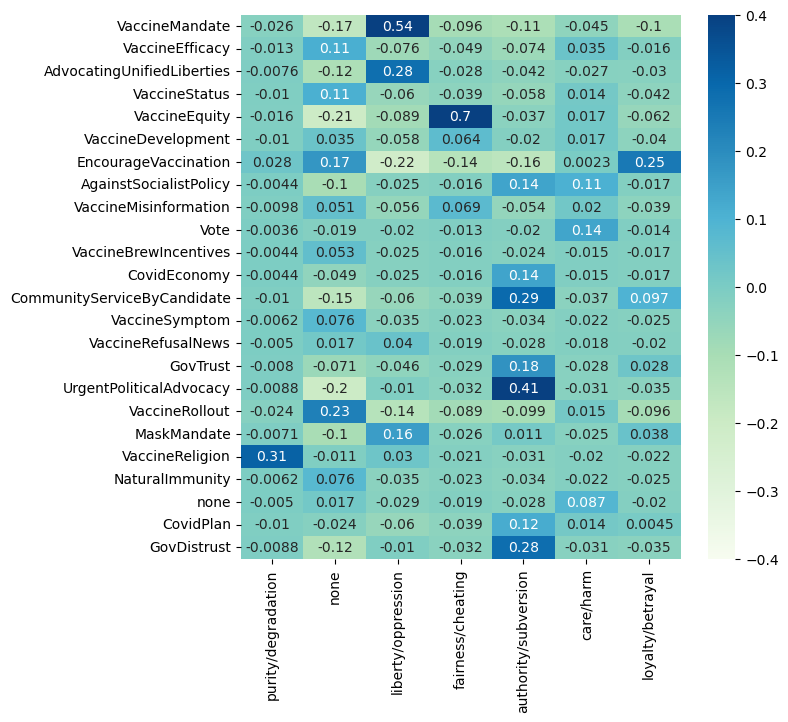

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming corrMatrix is defined as before
corrMatrix = get_mf_correlation_thm(new_df.Theme.values, new_df.moral_foundation.values)

# Set the figure size
plt.figure(figsize=(10, 8))  # You can adjust the dimensions as needed

# Create the heatmap
# sns.heatmap(corrMatrix, annot=True, cmap='Oranges', center=0, vmin=-0.4, vmax=0.4, square=False)

# Define your light palette
sns.heatmap(corrMatrix, annot=True, cmap='GnBu', center=0, vmin=-0.4, vmax=0.4, square=False)

# Adjust subplot parameters if needed
plt.subplots_adjust(left=0.35, bottom=0.2)  # Adjust these values as needed

# Save the figure
#plt.savefig('image/covid_thm_mf_iter2.png')

# Show the plot
plt.show()


## Baseline: LDA topic model

In [189]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from gensim import corpora, models
import gensim

# Download stopwords from NLTK
nltk.download('stopwords')

# # Sample documents
# documents = [
#     "Text of the first document.",
#     "Text of the second document.",
#     # Add more documents here
# ]
documents =  df.ad_creative_body.values
# Preprocessing
stop_words = set(stopwords.words('english'))
texts = [[word for word in document.lower().split() if word not in stop_words]
         for document in documents]

# Turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

# Convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# Generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state= 32)

# Assign topics to documents
doc_topics = [max(ldamodel.get_document_topics(doc), key=lambda x: x[1])[0] for doc in corpus]

# Create a DataFrame
df_lda = pd.DataFrame({
    'text': documents,
    'topic': doc_topics,
    'mf': df.moral_foundation.values
})

print(df_lda)
#df_lda.to_csv('data/LDA_20.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tunazislam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                  text  topic  \
0    Looking for a food pantry or food distribution...      1   
1    Tested for safety and trusted by doctors, the ...      2   
2    Newsom's school vaccine mandate is one of the ...      9   
3    Don't know if it is moral to take the COVID va...      0   
4    Take Your Best Shot | "I'm fully vaccinated ag...      2   
..                                                 ...    ...   
560  “The natural immune protection that develops a...      4   
561  Delta is more than twice as contagious as the ...      9   
562  Is natural immunity from COVID-19 better than ...      5   
563  Good morning fam, here's Rand Paul spitting st...      5   
564  Kentucky Breaking: Rand Paul says he will not ...      1   

                       mf  
0                    none  
1                    none  
2    authority/subversion  
3                    none  
4                    none  
..                    ...  
560                  no

In [190]:
# Specify the columns you want to keep
columns_to_keep = ['mf', 'topic']

# Create a new DataFrame with only the specified columns
new_df = df_lda[columns_to_keep]
new_df

,mf,topic
0,none,1
1,none,2
2,authority/subversion,9
3,none,0
4,none,2
...,...,...
560,none,4
561,none,9
562,none,5
563,none,5


In [191]:
# def get_stance_correlation_LDA(topic_labels, stance_labels):
#     topic_label_set = set(topic_labels)

#     topic_variables = {}
#     for lbl in topic_label_set:
#         topic_variables[lbl] = []
#     stance_variables = {'pro-energy': [], 'clean-energy': []}
#     stance_idx_map = ['pro-energy', 'clean-energy']

#     for topic_lbl, stance_lbl in zip(topic_labels, stance_labels):
#         for var in topic_variables:
#             if topic_lbl == var:
#                 topic_variables[var].append(1)
#             else:
#                 topic_variables[var].append(0)
#         for var in stance_variables:
#             if stance_idx_map[stance_lbl] == var:
#                 stance_variables[var].append(1)
#             else:
#                 stance_variables[var].append(0)
#     df1 = pd.DataFrame(topic_variables, columns=topic_variables.keys())
#     df2 = pd.DataFrame(stance_variables, columns=['pro-energy', 'clean-energy'])
#     #corrMatrix = corr(df2, df1)
#     corrMatrix = pd.concat([df2, df1], axis=1, keys=['df2', 'df1']).corr().loc['df1', 'df2']
#     return corrMatrix


def get_mf_correlation_thm_LDA(thm_labels, mf_labels):
    thm_label_set = set(thm_labels) 
    thm_variables = {}
    for lbl in thm_label_set:
        thm_variables[lbl] = []
    mf_label_set = set(mf_labels) 
    mf_variables = {}
    for lbl in mf_label_set:
        mf_variables[lbl] = []

    for thm_lbl, mf_lbl in zip(thm_labels, mf_labels):
        #print(mf_lbl)
        # if mf_lbl > 1:
        #     continue
        for var in thm_variables:
            if thm_lbl == var:
                thm_variables[var].append(1)
            else:
                thm_variables[var].append(0)
        for var in mf_variables:
            if mf_lbl == var:
                mf_variables[var].append(1)
            else:
                mf_variables[var].append(0)
    df1 = pd.DataFrame(thm_variables, columns=thm_variables.keys())
    df2 = pd.DataFrame(mf_variables, columns=mf_variables.keys())
    corrMatrix = pd.concat([df2, df1], axis=1, keys=['df2', 'df1']).corr().loc['df1', 'df2']
    return corrMatrix


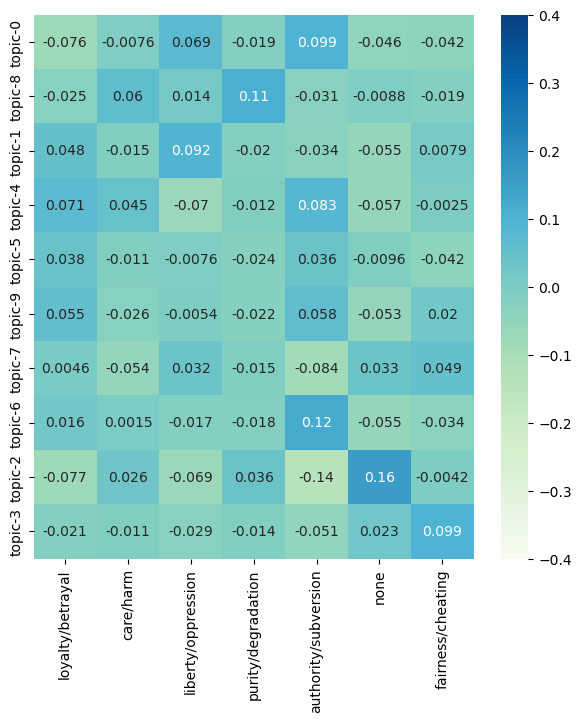

In [192]:
import seaborn as sns
topics = ["topic-{}".format(x) for x in new_df.topic.values]
corrMatrix = get_mf_correlation_thm_LDA(topics, new_df.mf.values)

# Set the figure size
plt.figure(figsize=(10, 8))  # You can adjust the dimensions as needed
#plt.figure(figsize=(8, 4))  # 10 topics
# Create the heatmap
sns.heatmap(corrMatrix, annot=True, cmap='GnBu', center=0, vmin=-0.4, vmax=0.4, square=False)

# Adjust subplot parameters if needed
plt.subplots_adjust(left=0.35, bottom=0.2)  # Adjust these values as needed

plt.savefig('image/mf_thm_lda_10_covid.png')

# Show the plot
plt.show()


## Baseline BERTopic

In [193]:
from bertopic import BERTopic

# Create a BERTopic instance
#topic_model = BERTopic()
topic_model = BERTopic(nr_topics=15)   #change number of topics 
# Fit the model to your data
topics, _ = topic_model.fit_transform(df['ad_creative_body'])

In [194]:
# Combine the original documents with their assigned topics
df_with_topics = pd.DataFrame({'text': df['ad_creative_body'], 'topic': topics, 'mf' : df['moral_foundation']})

# Display the DataFrame
print(df_with_topics)

                                                  text  topic  \
0    Looking for a food pantry or food distribution...      9   
1    Tested for safety and trusted by doctors, the ...      5   
2    Newsom's school vaccine mandate is one of the ...     -1   
3    Don't know if it is moral to take the COVID va...     -1   
4    Take Your Best Shot | "I'm fully vaccinated ag...      5   
..                                                 ...    ...   
560  “The natural immune protection that develops a...     -1   
561  Delta is more than twice as contagious as the ...     -1   
562  Is natural immunity from COVID-19 better than ...      5   
563  Good morning fam, here's Rand Paul spitting st...     -1   
564  Kentucky Breaking: Rand Paul says he will not ...     -1   

                       mf  
0                    none  
1                    none  
2    authority/subversion  
3                    none  
4                    none  
..                    ...  
560                  no

In [195]:
# Specify the columns you want to keep
columns_to_keep = ['mf', 'topic']

# Create a new DataFrame with only the specified columns
new_df = df_with_topics[columns_to_keep]
new_df

,mf,topic
0,none,9
1,none,5
2,authority/subversion,-1
3,none,-1
4,none,5
...,...,...
560,none,-1
561,none,-1
562,none,5
563,none,-1


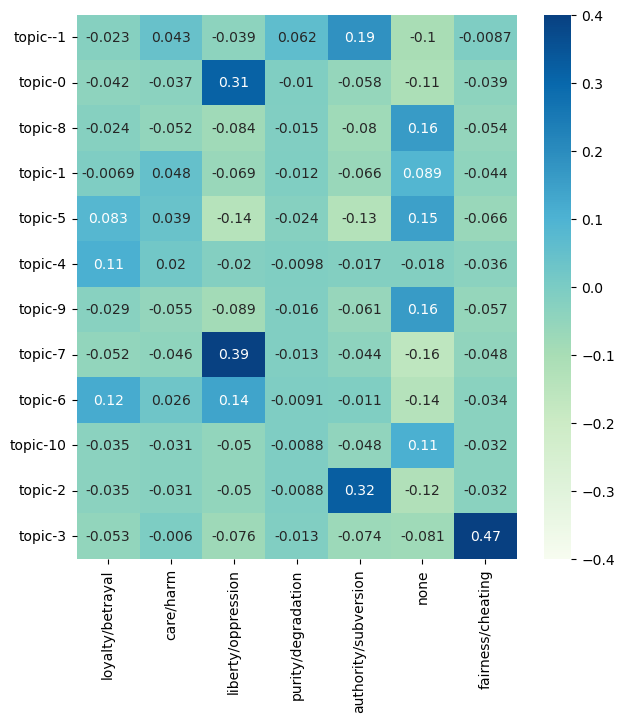

In [196]:
import seaborn as sns
topics = ["topic-{}".format(x) for x in new_df.topic.values]
corrMatrix = get_mf_correlation_thm_LDA(topics, new_df.mf.values)


plt.figure(figsize=(10, 8))  # You can adjust the dimensions as needed
#plt.figure(figsize=(8, 4))  # 10 topics
# Create the heatmap
sns.heatmap(corrMatrix, annot=True, cmap='GnBu', center=0, vmin=-0.4, vmax=0.4, square=False)

# Adjust subplot parameters if needed
plt.subplots_adjust(left=0.35, bottom=0.2)  # Adjust these values as needed

# Save the figure
plt.savefig('image/mf_thm_bertopic_15_covid.png')

# Show the plot
plt.show()


### Calculate Acc and F1 for LLMs and SBERT

In [7]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
# Load the CSV file
file_path = 'data/Covid/gt_mf_llm_sbert_covid.csv'

fb = pd.read_csv(file_path)
wf1 = f1_score(fb.gt_theme.values, fb.pred_theme_llms.values, average='weighted')
mf1 = f1_score(fb.gt_theme.values, fb.pred_theme_llms.values, average='macro')
acc = f1_score(fb.gt_theme.values, fb.pred_theme_llms.values, average='micro')


print(len(df),wf1,mf1, acc)




565 0.8551088417020098 0.8173721467352064 0.8548672566371681


In [9]:
wf1 = f1_score(fb.gt_theme.values, fb.pred_theme_sbert.values, average='weighted')
mf1 = f1_score(fb.gt_theme.values, fb.pred_theme_sbert.values, average='macro')
acc = f1_score(fb.gt_theme.values, fb.pred_theme_sbert.values, average='micro')


print(len(df),wf1,mf1, acc)

565 0.43510559971194757 0.4482739309443522 0.41415929203539825


## Confusion Matrix

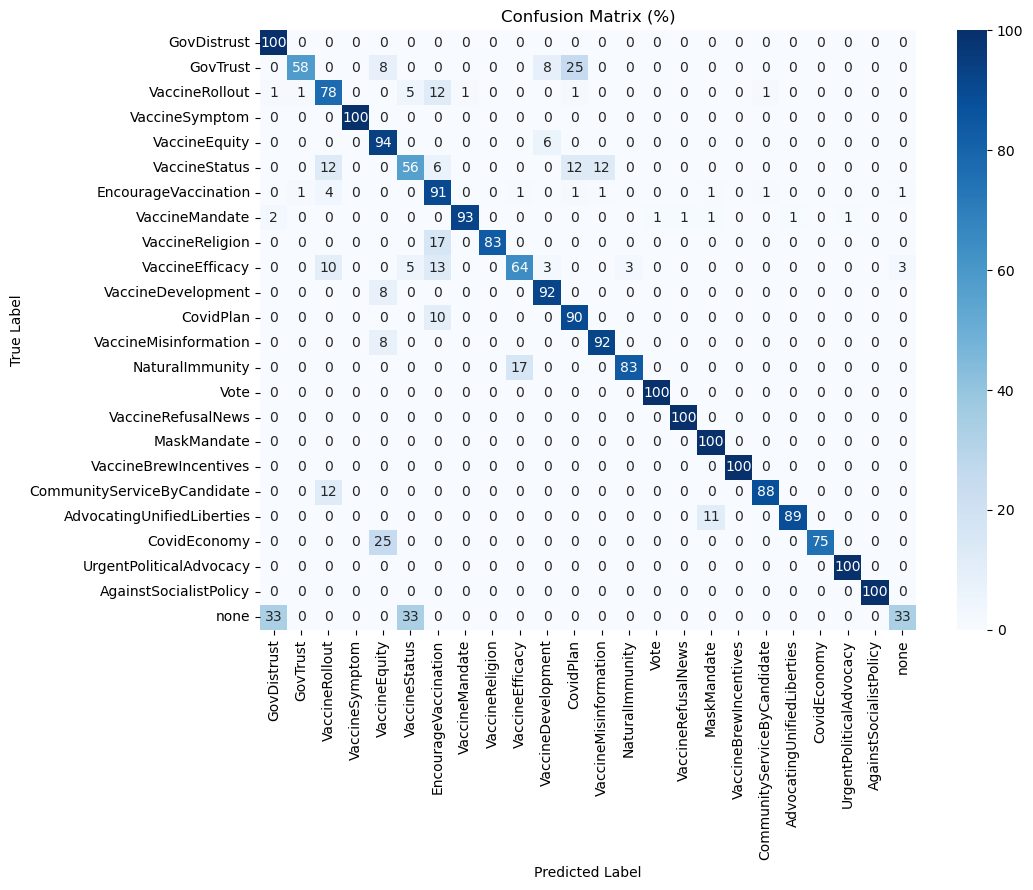

In [10]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
# Replace 'true_labels' and 'predicted_labels' with your actual data
true_labels = fb['gt_theme'].values
#predicted_labels = fb['pred_theme'].values #sbert
predicted_labels = fb['pred_theme_llms'].values #LLMs
###Add labels to the matrix
classes = [
    'GovDistrust', 'GovTrust', 'VaccineRollout', 'VaccineSymptom', 'VaccineEquity',
    'VaccineStatus', 'EncourageVaccination', 'VaccineMandate', 'VaccineReligion', 'VaccineEfficacy',
    'VaccineDevelopment', 'CovidPlan', 'VaccineMisinformation', 'NaturalImmunity', 'Vote', 
    'VaccineRefusalNews', 'MaskMandate', 'VaccineBrewIncentives', 'CommunityServiceByCandidate',
    'AdvocatingUnifiedLiberties', 'CovidEconomy', 'UrgentPoliticalAdvocacy', 'AgainstSocialistPolicy',
    'none'
]  # Replace with your class labels



# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels = classes)
#conf_matrix = multilabel_confusion_matrix(true_labels, predicted_labels, labels = classes)

# Normalize confusion matrix to show percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Create a heatmap for the confusion matrix
plt.figure(figsize=(11, 9))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.0f', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
#plt.savefig('image/cm_550_LLMs_covid.png', dpi=300, bbox_inches = "tight")
#plt.savefig('image/cm_550_SBERT_covid.png', dpi=300, bbox_inches = "tight")
plt.show()